In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [86]:
! gdown  --id 1WEiWPmtvwXDYDofKzJzg75SH22UCqqOb
! gdown  --id 1qKwfBtdGcpflaaS9DFf5p3VHFXGRSIVw 

Downloading...
From: https://drive.google.com/uc?id=1WEiWPmtvwXDYDofKzJzg75SH22UCqqOb
To: D:\Tugas Kuliah\SEMESTER 5\Pembelajaran Mesin\Tugas Besar\kendaraan_train.csv

  0%|          | 0.00/15.2M [00:00<?, ?B/s]
  3%|3         | 524k/15.2M [00:00<00:05, 2.86MB/s]
  7%|6         | 1.05M/15.2M [00:00<00:04, 3.38MB/s]
 10%|#         | 1.57M/15.2M [00:00<00:03, 3.59MB/s]
 14%|#3        | 2.10M/15.2M [00:00<00:03, 3.86MB/s]
 17%|#7        | 2.62M/15.2M [00:00<00:03, 3.89MB/s]
 24%|##4       | 3.67M/15.2M [00:00<00:02, 4.26MB/s]
 28%|##7       | 4.19M/15.2M [00:01<00:02, 3.99MB/s]
 31%|###       | 4.72M/15.2M [00:01<00:02, 3.92MB/s]
 34%|###4      | 5.24M/15.2M [00:01<00:02, 3.88MB/s]
 38%|###7      | 5.77M/15.2M [00:01<00:02, 3.88MB/s]
 41%|####1     | 6.29M/15.2M [00:01<00:02, 3.81MB/s]
 45%|####4     | 6.82M/15.2M [00:01<00:02, 3.81MB/s]
 48%|####8     | 7.34M/15.2M [00:01<00:02, 3.84MB/s]
 52%|#####1    | 7.86M/15.2M [00:02<00:01, 3.86MB/s]
 55%|#####5    | 8.39M/15.2M [00:02<00:01, 4.0

In [87]:
DataTrain = pd.read_csv("kendaraan_train.csv")
DataTest = pd.read_csv("kendaraan_test.csv")

In [88]:
DataTrain

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [89]:
DataTest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [90]:
DataTest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [91]:
print("Banyak baris dan kolom untuk Data Train adalah : ", DataTrain.shape)
print("Banyak baris dan kolom untuk Data Test adalah : ", DataTest.shape)

Banyak baris dan kolom untuk Data Train adalah :  (285831, 12)
Banyak baris dan kolom untuk Data Test adalah :  (47639, 11)


In [92]:
DataTrain.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [93]:
DataTest.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,112.180566,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,54.162703,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,135.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [94]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [95]:
DataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [96]:
DataTrain.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [97]:
DataTrain.dropna(inplace = True)

In [98]:
DataTrain.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [99]:
DataTrain['Jenis_Kelamin'].replace('Wanita', 1, inplace = True)
DataTrain['Jenis_Kelamin'].replace('Pria', 2, inplace = True)
DataTrain['Kendaraan_Rusak'].replace('Pernah', 1, inplace = True)
DataTrain['Kendaraan_Rusak'].replace('Tidak', 2, inplace = True)
DataTrain['Umur_Kendaraan'].replace('1-2 Tahun', 1, inplace = True)
DataTrain['Umur_Kendaraan'].replace('< 1 Tahun', 2, inplace = True)
DataTrain['Umur_Kendaraan'].replace('> 2 Tahun', 3, inplace = True)

In [100]:
DataTest.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [101]:
DataTest['Jenis_Kelamin'].replace('Wanita', 1, inplace = True)
DataTest['Jenis_Kelamin'].replace('Pria', 2, inplace = True)
DataTest['Kendaraan_Rusak'].replace('Pernah', 1, inplace = True)
DataTest['Kendaraan_Rusak'].replace('Tidak', 2, inplace = True)
DataTest['Umur_Kendaraan'].replace('1-2 Tahun', 1, inplace = True)
DataTest['Umur_Kendaraan'].replace('< 1 Tahun', 2, inplace = True)
DataTest['Umur_Kendaraan'].replace('> 2 Tahun', 3, inplace = True)

In [102]:
print("Banyaknya duplikat data pada Data Train : ", DataTrain.duplicated().sum())
print("Banyaknya duplikat data pada Data Test : ", DataTest.duplicated().sum())

Banyaknya duplikat data pada Data Train :  0
Banyaknya duplikat data pada Data Test :  3


In [103]:
DataTest.drop_duplicates()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,1,1,46963,26,145,0
1,2,22,1,47,1,2,2,39624,152,241,0
2,2,24,1,28,1,2,2,110479,152,62,0
3,2,46,1,8,1,1,2,36266,124,34,0
4,2,35,1,23,0,1,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,2,61,1,46,0,3,1,31039,124,67,0
47635,2,41,1,15,0,1,1,2630,157,232,0
47636,2,24,1,29,1,2,2,33101,152,211,0
47637,2,59,1,30,0,1,1,37788,26,239,1


In [104]:
print("Banyak baris dan kolom untuk Data Train adalah : ", DataTrain.shape)
print("Banyak baris dan kolom untuk Data Test adalah : ", DataTest.shape)

Banyak baris dan kolom untuk Data Train adalah :  (171068, 12)
Banyak baris dan kolom untuk Data Test adalah :  (47639, 11)


In [105]:
encode = LabelEncoder()
DataTrain['Jenis_Kelamin'] = encode.fit_transform(DataTrain['Jenis_Kelamin'])
encode = LabelEncoder()
DataTrain['Umur_Kendaraan'] = encode.fit_transform(DataTrain['Umur_Kendaraan'])
encode = LabelEncoder()
DataTrain['Kendaraan_Rusak'] = encode.fit_transform(DataTrain['Kendaraan_Rusak'])
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 171068 non-null  int64  
 1   Jenis_Kelamin      171068 non-null  int64  
 2   Umur               171068 non-null  float64
 3   SIM                171068 non-null  float64
 4   Kode_Daerah        171068 non-null  float64
 5   Sudah_Asuransi     171068 non-null  float64
 6   Umur_Kendaraan     171068 non-null  int64  
 7   Kendaraan_Rusak    171068 non-null  int64  
 8   Premi              171068 non-null  float64
 9   Kanal_Penjualan    171068 non-null  float64
 10  Lama_Berlangganan  171068 non-null  float64
 11  Tertarik           171068 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 17.0 MB


In [106]:
encode = LabelEncoder()
DataTest['Jenis_Kelamin'] = encode.fit_transform(DataTest['Jenis_Kelamin'])
encode = LabelEncoder()
DataTest['Umur_Kendaraan'] = encode.fit_transform(DataTest['Umur_Kendaraan'])
encode = LabelEncoder()
DataTest['Kendaraan_Rusak'] = encode.fit_transform(DataTest['Kendaraan_Rusak'])
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 171068 non-null  int64  
 1   Jenis_Kelamin      171068 non-null  int64  
 2   Umur               171068 non-null  float64
 3   SIM                171068 non-null  float64
 4   Kode_Daerah        171068 non-null  float64
 5   Sudah_Asuransi     171068 non-null  float64
 6   Umur_Kendaraan     171068 non-null  int64  
 7   Kendaraan_Rusak    171068 non-null  int64  
 8   Premi              171068 non-null  float64
 9   Kanal_Penjualan    171068 non-null  float64
 10  Lama_Berlangganan  171068 non-null  float64
 11  Tertarik           171068 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 17.0 MB


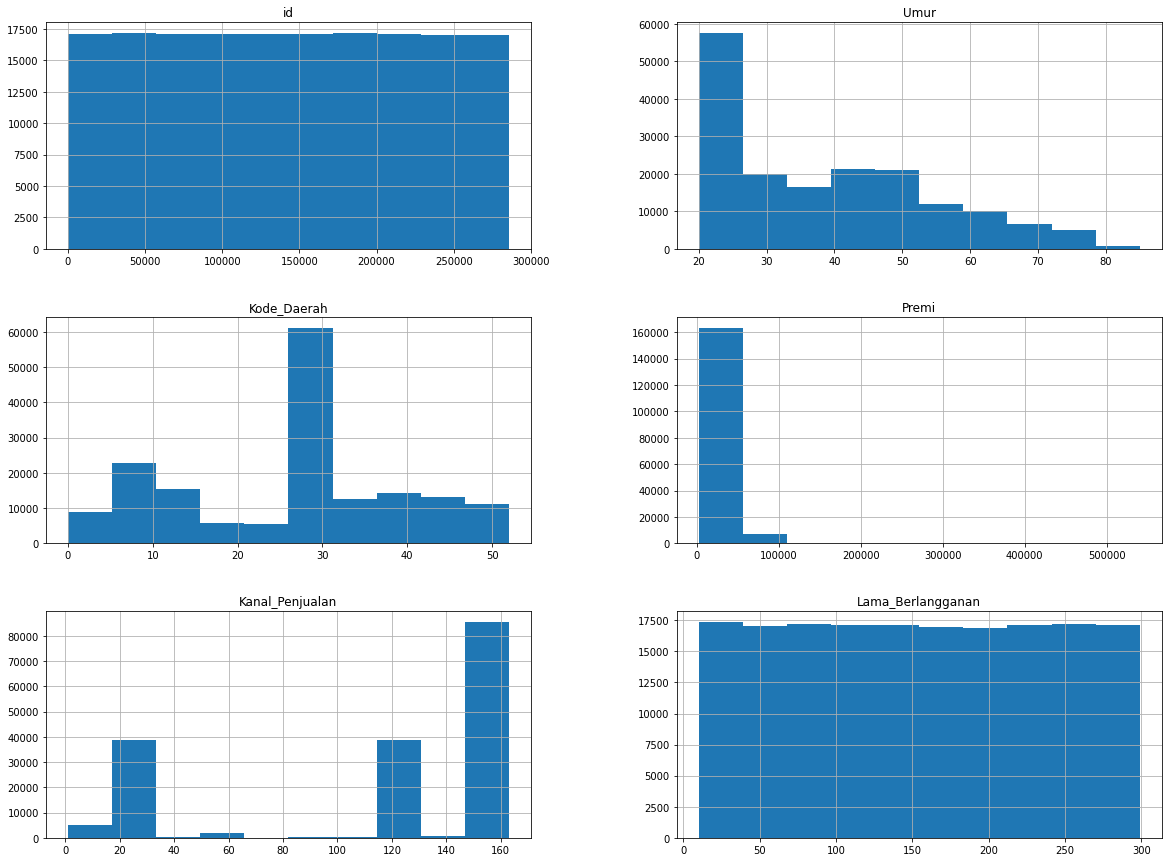

In [107]:
df_num = DataTrain.iloc[:,[0,2,4,8,9,10]]
hist = df_num.hist(figsize=(20,15))

<AxesSubplot:xlabel='Jenis_Kelamin', ylabel='count'>

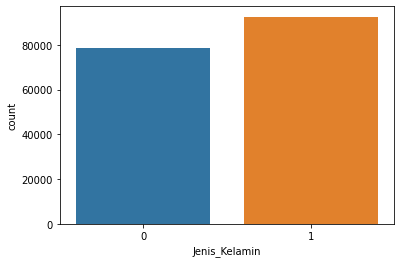

In [108]:
sns.countplot(x = 'Jenis_Kelamin', data = DataTrain)

<AxesSubplot:xlabel='Sudah_Asuransi', ylabel='count'>

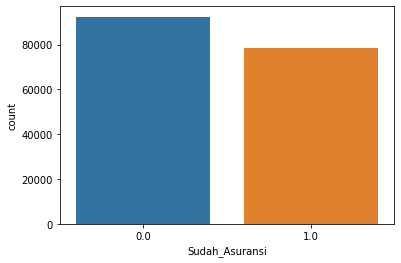

In [109]:
sns.countplot(x = 'Sudah_Asuransi', data = DataTrain)

<AxesSubplot:xlabel='SIM', ylabel='count'>

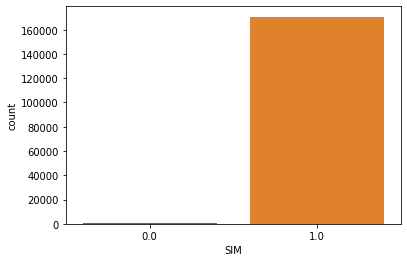

In [110]:
sns.countplot(x = 'SIM', data = DataTrain)

<AxesSubplot:xlabel='Umur_Kendaraan', ylabel='count'>

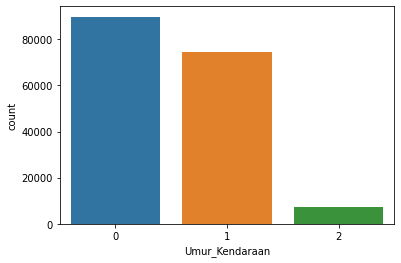

In [111]:
sns.countplot(x = 'Umur_Kendaraan', data = DataTrain)

<AxesSubplot:xlabel='Kendaraan_Rusak', ylabel='count'>

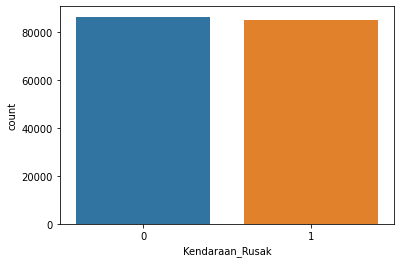

In [112]:
sns.countplot(x = 'Kendaraan_Rusak', data = DataTrain)

<AxesSubplot:xlabel='Tertarik', ylabel='count'>

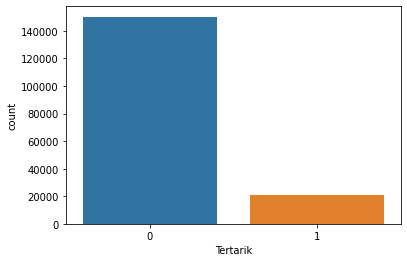

In [113]:
sns.countplot(x = 'Tertarik', data = DataTrain)

In [114]:
DataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Jenis_Kelamin      47639 non-null  int64
 1   Umur               47639 non-null  int64
 2   SIM                47639 non-null  int64
 3   Kode_Daerah        47639 non-null  int64
 4   Sudah_Asuransi     47639 non-null  int64
 5   Umur_Kendaraan     47639 non-null  int64
 6   Kendaraan_Rusak    47639 non-null  int64
 7   Premi              47639 non-null  int64
 8   Kanal_Penjualan    47639 non-null  int64
 9   Lama_Berlangganan  47639 non-null  int64
 10  Tertarik           47639 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB


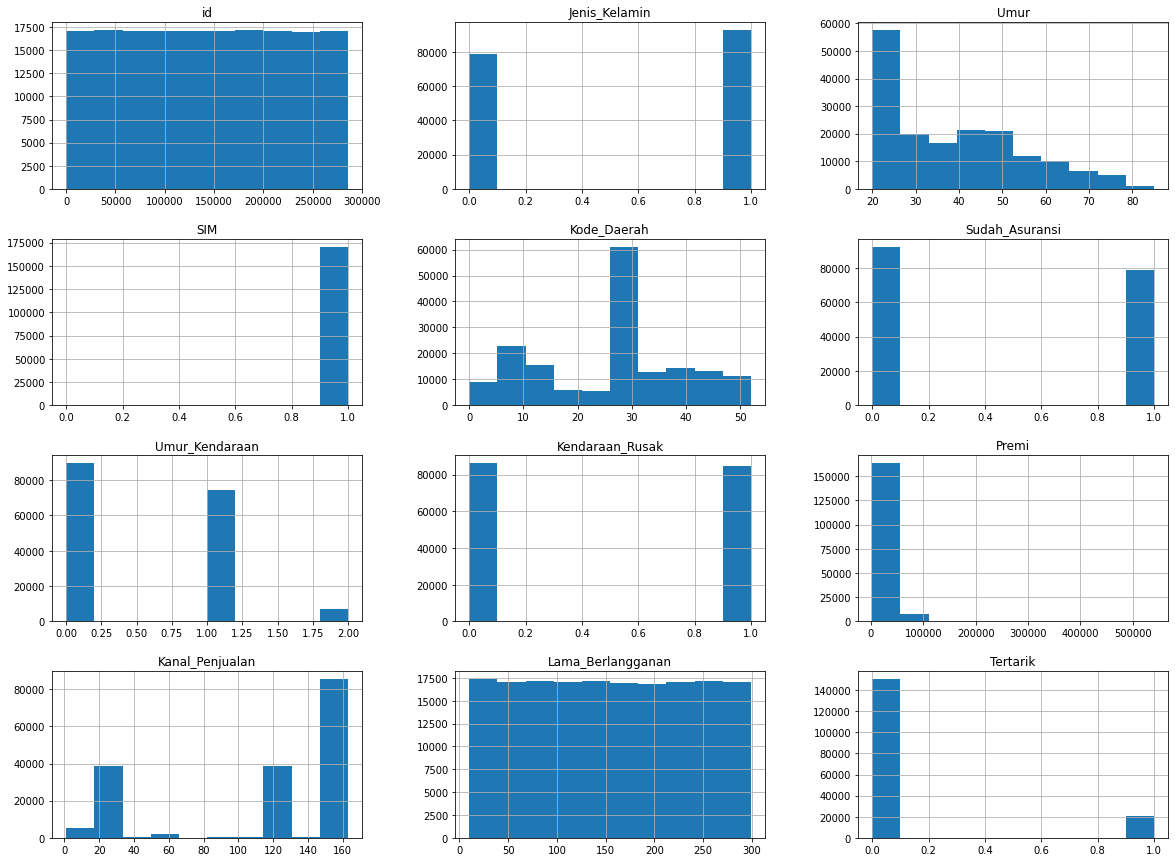

In [115]:

hist = DataTrain.hist(figsize=(20,15))

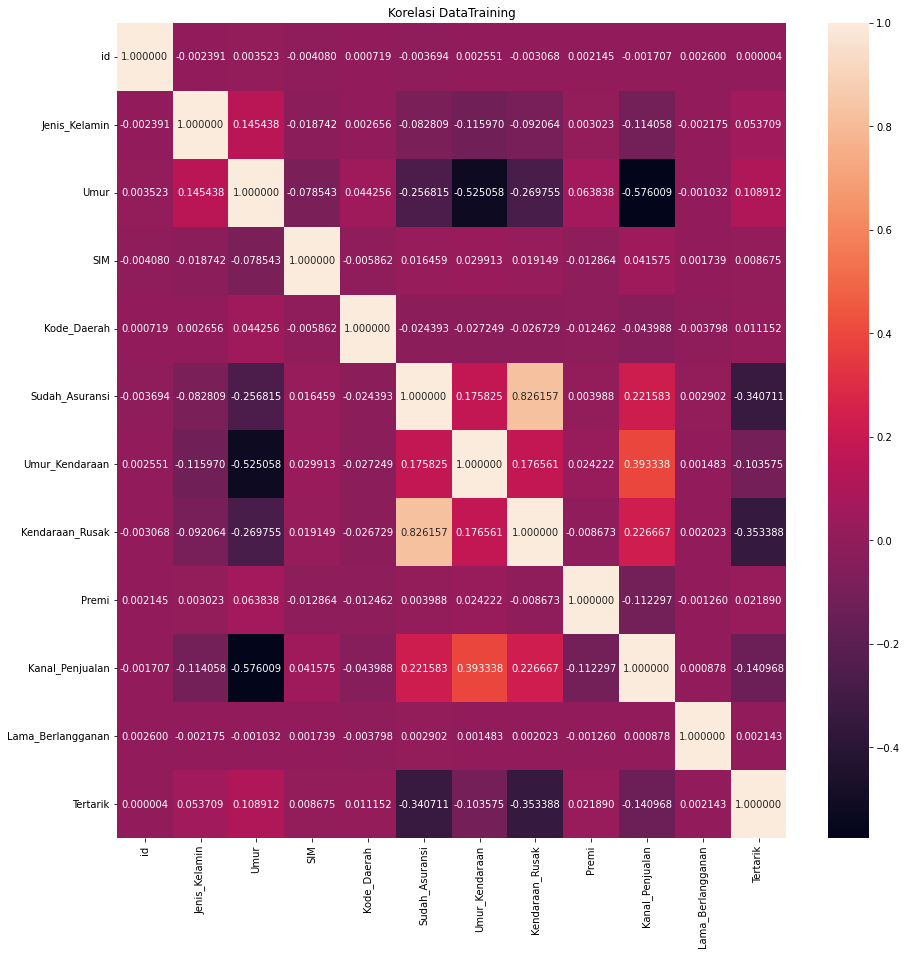

In [116]:
plt.figure(figsize = (15,15))
Korelasi = DataTrain.corr()
sns.heatmap(Korelasi, annot = True,fmt="f").set_title("Korelasi DataTraining")
plt.show()

In [117]:
Scaler = StandardScaler()

In [118]:
x = DataTrain['Kendaraan_Rusak'].values.reshape(-1,1)
y = DataTrain['Sudah_Asuransi'].values.reshape(-1,1)

In [119]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

# Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 =f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)
print(classification_report(y_test,Y_pred),"\n\n")

Confusion matrix for Naive Bayes
 [[16407  2072]
 [  892 14843]]
accuracy_Naive Bayes: 0.913
precision_Naive Bayes: 0.913
recall_Naive Bayes: 0.913
f1-score_Naive Bayes : 0.913
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     18479
         1.0       0.88      0.94      0.91     15735

    accuracy                           0.91     34214
   macro avg       0.91      0.92      0.91     34214
weighted avg       0.92      0.91      0.91     34214
 




# Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x,y)  
Y_pred = decision_tree.predict(x_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)
print(classification_report(y_test,Y_pred),"\n\n")

Confusion matrix for DecisionTree
 [[16407  2072]
 [  892 14843]]
accuracy_DecisionTree: 0.913
precision_DecisionTree: 0.913
recall_DecisionTree: 0.913
f1-score_DecisionTree : 0.913
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     18479
         1.0       0.88      0.94      0.91     15735

    accuracy                           0.91     34214
   macro avg       0.91      0.92      0.91     34214
weighted avg       0.92      0.91      0.91     34214
 


